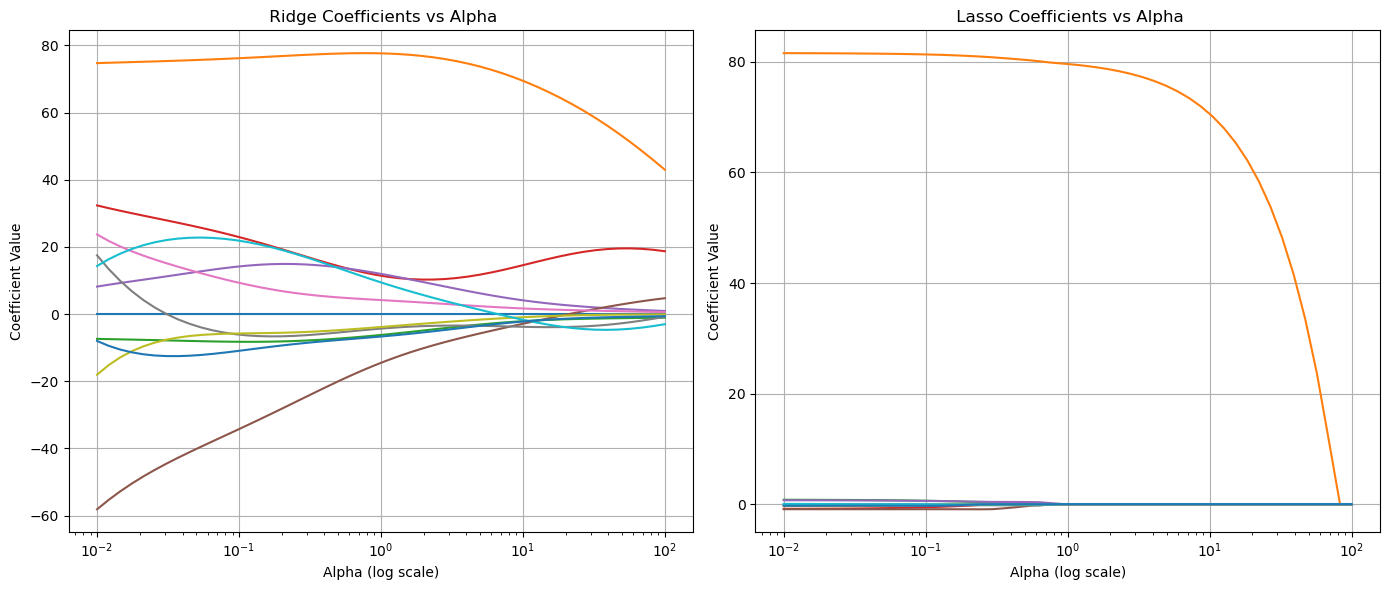

In [13]:
# 🛠 Prerequisites for Fresh Session
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge, Lasso

# Create synthetic regression data
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=200, n_features=1, noise=25, random_state=42)

# Polynomial transformation (Degree = 10)
poly = PolynomialFeatures(degree=10)
X_poly = poly.fit_transform(X)

# Standardize features
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

#  Alphas for regularizatio
alphas = np.logspace(-2, 2, 50)  #  Balanced range for both Ridge and Lasso

ridge_coefs = []
lasso_coefs = []

#  Fit Ridge and Lasso for each alpha
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    lasso = Lasso(alpha=alpha, max_iter=500000, tol=0.1)  #  Fix: Convergence warning patch
    
    ridge.fit(X_poly_scaled, y)
    lasso.fit(X_poly_scaled, y)

    ridge_coefs.append(ridge.coef_)
    lasso_coefs.append(lasso.coef_)

ridge_coefs = np.array(ridge_coefs)
lasso_coefs = np.array(lasso_coefs)

#  Plotting the Deathmatch Graphs
plt.figure(figsize=(14, 6))

#  Ridge Plot
plt.subplot(1, 2, 1)
for coef in ridge_coefs.T:
    plt.plot(alphas, coef)
plt.xscale('log')
plt.title(" Ridge Coefficients vs Alpha")
plt.xlabel("Alpha (log scale)")
plt.ylabel("Coefficient Value")
plt.grid(True)

#  Lasso Plot
plt.subplot(1, 2, 2)
for coef in lasso_coefs.T:
    plt.plot(alphas, coef)
plt.xscale('log')
plt.title(" Lasso Coefficients vs Alpha")
plt.xlabel("Alpha (log scale)")
plt.ylabel("Coefficient Value")
plt.grid(True)

plt.tight_layout()
plt.show()